# Task 2: To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear.

What will be predicted score if a student study for 9.25 hrs in a day?

In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#read csv file
df=pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
#analysis of csv file
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# Visualizing the Data

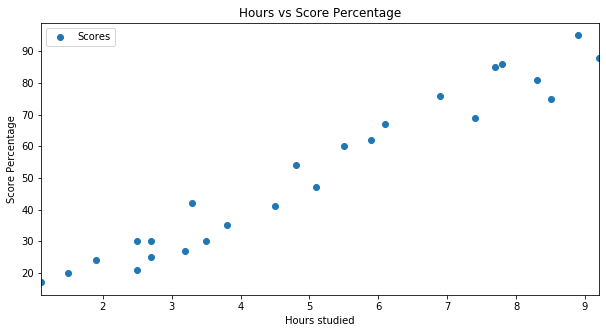

In [22]:
df.plot(x='Hours', y='Scores',style='o',figsize=(10,5))
plt.title("Hours vs Score Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Percentage")
plt.show()

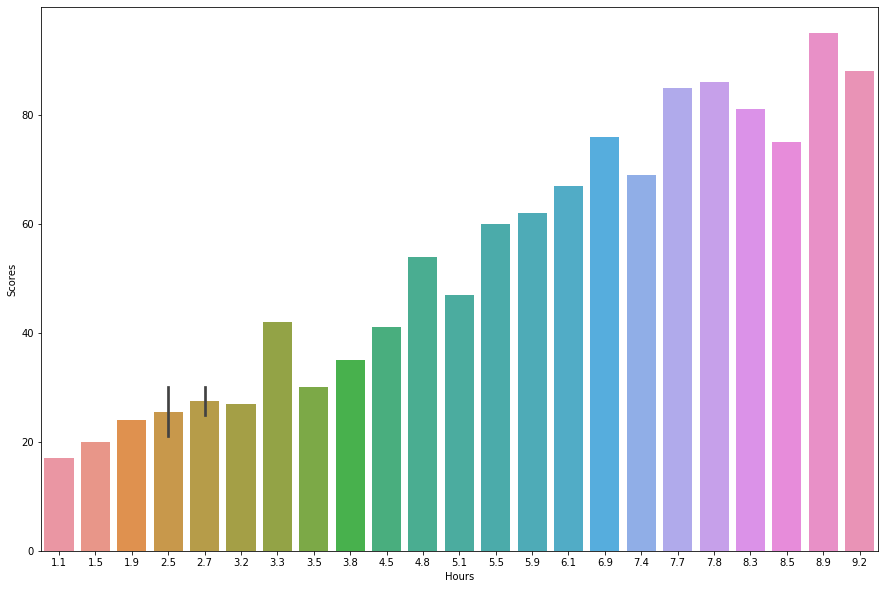

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(df['Hours'],df['Scores'])

# Preparing the data

In [25]:
X=df.drop('Scores',axis=1)
y=df.Scores

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20)


# Training the Algorithm and making Prediction

In [27]:
from sklearn.linear_model import LinearRegression
my_model=LinearRegression().fit(X_train,y_train)
print("Training Completed")
print("model score:",my_model.score(X_test,y_test))

Training Completed
model score: 0.9257451486723178


In [28]:
#prediction
y_pred=my_model.predict(X_test)

In [29]:
y_pred

array([79.7485491 , 84.64995059, 27.79369329, 86.61051118, 34.65565538])

In [30]:
#comparing Actual and Predicted
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
24,86,79.748549
8,81,84.649951
0,21,27.793693
3,75,86.610511
2,27,34.655655


What will be predicted score if a student study for 9.25 hrs in a day?

In [31]:
print("Number of Hours studied:9.25")
prediction=my_model.predict([[9.25]])
print("Predicted Score percentage:",prediction)

Number of Hours studied:9.25
Predicted Score percentage: [93.96261342]


Text(0, 0.5, 'Scores')

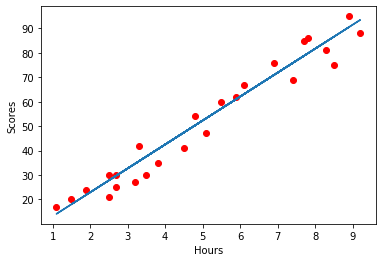

In [32]:
line=my_model.coef_*X+my_model.intercept_
plt.scatter(X,y,c='r')
plt.plot(X,line)
plt.xlabel("Hours")
plt.ylabel("Scores")

# Evaluating the model

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_pred,y_pred))

mean_absolute_error: 7.1922522684394945
mean_squared_error: 58.394015084089254
r2_score: 1.0
